# Tutorial for Simple Route Optimization without ASKCOS 
Tutorial without ASCKOS. Paths from ASKCOS were generated previously and used to create a RouteGraph. Scores were already assigned to them.   


### Import Targets and Scores

In [1]:
target_dict = {
    "COC5=CC(N=CN=C6NC7=CC=CC(OC)=C7)=C6C=C5OC" : 3,
    "COC1=CC(N=CN=C2NC3=CC=C(OCC4=CC=CC=C4)C=C3)=C2C=C1OC" : 4,
    "COC8=CC(N=CN=C9NC%10=CC=CC(Cl)=C%10)=C9C=C8OC" : 2,
    "COC%11=CC(N=CN=C%12NC%13=CC=CC(O)=C%13)=C%12C=C%11OC" : 11,
    "COC%14=CC(N=CN=C%15NC%16=CC=C(NC(C%17=CC=CC=C%17)=O)C=C%16)=C%15C=C%14OC" : 14,
}

### Import paths and create route graph

In [2]:
import pickle

route_graph_filename = 'route_graph_w_scores.pickle'
with open(route_graph_filename, 'rb') as file:
    route_graph = pickle.load(file)

### Set up the problem and solve 
After loading the previously saved route_graph (which has reaction scores already), create a RouteSelector object. 
Define optimization problem variables, set the objectives and constraints, and finally solve

In [3]:
from sparrow.route_selector import RouteSelector

route_selector = RouteSelector(
    route_graph,
    target_dict,
    calc_reaction_scores=False,
    weights=[1,1,1,1]
)

route_selector.define_variables()
route_selector.set_objective()
route_selector.set_constraints()
route_selector.optimize(solver=None)



/home/jfromer/anaconda3/envs/askcos/lib/python3.7/site-packages/pulp/pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/jfromer/anaconda3/envs/askcos/lib/python3.7/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/b715271de47740858eb77636cbdee72d-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/b715271de47740858eb77636cbdee72d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 3369 COLUMNS
At line 35836 RHS
At line 39201 BOUNDS
At line 48106 ENDATA
Problem MODEL has 3364 rows, 8904 columns and 13423 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is -30.1792 - 0.01 seconds
Cgl0003I 0 fixed, 178 tightened bounds, 259 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 153 tightened bounds, 152 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 6 strengthened rows, 2 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 5 strengthened rows, 0 substitutions
Cgl000

### Visualize the results 

Selected targets: 
COc1cc2ncnc(Nc3cccc(O)c3)c2cc1OC
COc1cccc(Nc2ncnc3cc(OC)c(OC)cc23)c1
COc1cc2ncnc(Nc3ccc(NC(=O)c4ccccc4)cc3)c2cc1OC


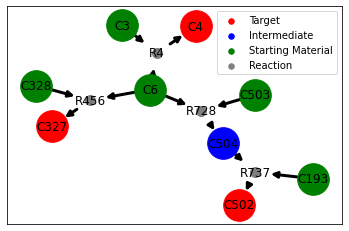

In [4]:
from sparrow.visualizer import Visualizer
import matplotlib.pyplot as plt

vis = Visualizer(
    route_graph,
    nonzero_vars=route_selector.optimal_variables(),
    )

fig_out_dir = "optimal_routes.png"
vis.plot_graph(fig_out_dir)

plt.show()